In [292]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
import math
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)

In [293]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

In [294]:
import git
git = git.Git("../../../sonarqube/") 

### Import builds and jobs

In [295]:
builds = pd.read_csv(f"{csv_folder}/builds_cleaned.csv", index_col=0)

In [296]:
jobs = pd.read_csv(f"{csv_folder}/allJobs.csv", index_col=0)
jobs

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
0,241946101,241946099,2017-06-12T09:21:03Z,2017-06-12T09:13:51.063Z,2017-06-12T09:21:43Z,25614.1,canceled,2018-06-02T14:51:19.734Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
1,241946103,241946099,2017-06-12T09:22:43Z,2017-06-12T09:13:51.107Z,2017-06-12T09:21:43Z,25614.2,canceled,2018-06-02T14:51:19.764Z,2e4b539138fde6f664a865c81fb6ab0763f74bdb,70181895,SONAR-9304 Add test on organization deletion,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
2,241952024,241952022,2017-06-12T09:36:43Z,2017-06-12T09:32:52.227Z,2017-06-12T09:37:23Z,25615.1,canceled,2018-06-02T14:51:25.661Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
3,241952025,241952022,NaN,2017-06-12T09:32:52.237Z,2017-06-12T09:37:24Z,25615.2,canceled,2018-06-02T14:51:25.669Z,464f5da96733c14818f4b4bfeb878951b859ee0c,70183628,SONAR-9304 Add comments to make tests clearer,refs/heads/feature/atlas/MMF-324/builtin-profiles,https://github.com/SonarSource/sonarqube/compa...
4,241952045,241952044,2017-06-12T09:42:16Z,2017-06-12T09:32:59.994Z,2017-06-12T09:53:48Z,25616.1,passed,2018-06-02T14:51:26.125Z,7358e9a93e47ac9fcaebe960c00ab8bd28e9890e,70183633,SONAR-9304 Add comments to make tests clearer,refs/pull/2104/merge,https://github.com/SonarSource/sonarqube/pull/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136978,315411337,315411335,2017-12-12T15:23:15Z,2017-12-12T15:22:41.091Z,2017-12-12T15:26:39Z,34811.2,passed,2018-06-03T16:57:36.971Z,abd0650045b3fcc95ac8459a6fc2450a1bd889c0,93642638,SONAR-10134 Fix ITs on quality gates by settin...,refs/pull/2866/merge,https://github.com/SonarSource/sonarqube/pull/...
136979,315421139,315421138,2017-12-12T15:43:05Z,2017-12-12T15:42:34.642Z,2017-12-12T15:44:59Z,34812.1,passed,2018-06-03T16:57:47.762Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136980,315421140,315421138,2017-12-12T15:43:26Z,2017-12-12T15:42:34.682Z,2017-12-12T15:44:25Z,34812.2,passed,2018-06-03T16:57:47.778Z,04d5e19040df59e2a4a1025514c9b8b7c42378f8,93645831,SONAR-10187 Provide more options to populate e...,refs/heads/feature/stas/MMF-1128,https://github.com/SonarSource/sonarqube/compa...
136981,315421147,315421146,2017-12-12T15:43:25Z,2017-12-12T15:42:40.583Z,2017-12-12T16:01:05Z,34813.1,passed,2018-06-03T16:57:47.837Z,a5005e0ca38a67e7d70c255154990ed10be31020,93645838,SONAR-10187 Provide more options to populate e...,refs/pull/2895/merge,https://github.com/SonarSource/sonarqube/pull/...


### Pull Requests commits

In [297]:
pr_commits = pd.read_csv(f"{csv_folder}/pr_commits.csv", index_col=0)

### Import all tag comparisons dataset

In [298]:
compare_tags = pd.read_csv(f"{csv_folder}/compare_tags_sha.csv", index_col=0)
compare_tags.head(2)

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date
0,8.4.2.36762,2020-08-27 14:11:31,2de1f343e3dbd9e88007b42e475512677c04eb8a,a0d372f704998d38856c26e28662fd7de062f873,0,4,8.4.1.35646,2020-07-14 08:13:18
1,8.4.0.35506,2020-07-03 07:09:27,74b4533439f380827d68e8c01667eeaecad89fc7,a0d372f704998d38856c26e28662fd7de062f873,6,0,8.4.1.35646,2020-07-14 08:13:18


### Import tags

In [299]:
alltags = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
alltags.Date = pd.to_datetime(alltags.Date)
alltags.actual_release_date = pd.to_datetime(alltags.actual_release_date)
alltags["month"] = alltags.Date.dt.month
alltags["year"] = alltags.Date.dt.year
alltags.rename(columns={"Date":"release_date"}, inplace=True)
tags = alltags.tail(-1)
tags.head()

,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
1,NaT,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaT,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2
5,2015-11-26,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,11,2015,5,5.2


### Filter the ones after the project started using TravisCI

In [300]:
tags = tags[tags.release_date > "2015-03-10"]

In [301]:
tags.Tag.nunique()

56

### Import tag comparison pairs

In [302]:
tags_comparison = pd.read_csv(f"{csv_folder}/tags_comparison_final_updated.csv", index_col=0)
tags_comparison.from_commit_date = pd.to_datetime(tags_comparison.from_commit_date)
tags_comparison.to_commit_date = pd.to_datetime(tags_comparison.to_commit_date)
tags_comparison.from_author_date = pd.to_datetime(tags_comparison.from_author_date)
tags_comparison.to_author_date = pd.to_datetime(tags_comparison.to_author_date)
tags_comparison

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
2307,4.5.5,2015-07-30 10:02:58,cc8a9472c671598fb3158b51b15863448a477a50,12d931e5a31e1692a428bbb34ba11cd63aebf998,16,0,4.5.6,2015-10-16 09:31:18,16,77 days 23:28:20,77.978009,2015-07-30 12:02:58,2015-10-16 11:31:18,77 days 23:28:20,77.978009
2296,4.5.6,2015-10-16 09:31:18,12d931e5a31e1692a428bbb34ba11cd63aebf998,e2afb0bff1b8be759789d2c1bc9348de6f519f83,7,0,4.5.7,2016-04-08 13:44:39,7,175 days 04:13:21,175.175938,2015-10-16 11:31:18,2016-04-08 15:44:39,175 days 04:13:21,175.175938
2257,5.1,2015-04-02 08:09:45,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,7,0,5.1.1,2015-06-02 08:34:06,7,61 days 00:24:21,61.016910,2015-04-02 10:09:45,2015-06-02 10:34:06,61 days 00:24:21,61.016910
2271,5.1-RC2,2015-03-23 15:22:47,dfc9f94b72103ee941cc11da6529623fa91df509,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,17,0,5.1,2015-04-02 08:09:45,17,9 days 16:46:58,9.699282,2015-03-23 16:22:47,2015-04-02 10:09:45,9 days 17:46:58,9.740949
2242,5.1.1,2015-06-02 08:34:06,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,12,0,5.1.2,2015-07-27 08:03:21,12,54 days 23:29:15,54.978646,2015-06-02 10:34:06,2015-07-27 10:03:21,54 days 23:29:15,54.978646
2226,5.1.2,2015-07-27 08:03:21,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,2762,0,5.2-RC1,2015-10-12 15:58:42,2762,77 days 07:55:21,77.330104,2015-07-27 10:03:21,2015-10-12 17:58:42,77 days 07:55:21,77.330104
2172,5.2,2015-11-02 08:56:19,f045be98be3ba032b6b19d71574038eeeb91803b,c979578645aaf77c447b250136db32a7067619a1,513,0,5.3-RC1,2015-12-09 12:47:34,513,37 days 03:51:15,37.160590,2015-11-02 09:56:19,2015-12-09 13:47:34,37 days 03:51:15,37.160590
2209,5.2-RC1,2015-10-12 15:58:42,d5dd7720eb79dc0cae1a1b38f83e757a031f8ca9,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,4,0,5.2-RC2,2015-10-13 10:06:23,4,0 days 18:07:41,0.755336,2015-10-12 17:58:42,2015-10-13 12:06:23,0 days 18:07:41,0.755336
2191,5.2-RC2,2015-10-13 10:06:23,3d2b3bbd084ccf75d1921382315d3ac3037ed3bc,ef358b002383f918448dcb5e8ac40b64a35a4c26,56,0,5.2-RC3,2015-10-20 13:47:33,56,7 days 03:41:10,7.153588,2015-10-13 12:06:23,2015-10-20 15:47:33,7 days 03:41:10,7.153588
2153,5.3-RC1,2015-12-09 12:47:34,c979578645aaf77c447b250136db32a7067619a1,29a84111f6cc9298f83df515830ff40a41d0976c,40,1,5.3-RC2,2015-12-17 16:02:01,41,8 days 03:14:27,8.135035,2015-12-09 13:47:34,2015-12-17 17:02:01,8 days 03:14:27,8.135035


### Import issues

In [303]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues = issues[~(issues.edition == "Enterprise")]
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

In [304]:
issues.shape

(5594, 108)

### Import issue versions

In [305]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import Pull request data

In [314]:
prs = pd.read_csv(f"{csv_folder}/prs.csv", index_col=0)

In [315]:
prs

,pr_number,title,base_sha,base_ref,head_sha,head_ref
0,2015,SONAR-9122 prevent setting a project as private,b10cb50ec7c26a85dd549de6633e60705994bd66,master,13bb5a131e0fa2c20f041d4e8c79e847fc601348,feature/stas/lock-private-projects
1,2008,Upgrade scanner in performance tests,7b2958e443c4c629f3e35aba7182d7cb524b250b,master,9a90c2f7097fab8fe94681b1e7ea09294a308314,feature/sb/sonar-runner-in-its
2,2026,SQ 6.4 web hardening 5,87d60ccc748d84f55f7c102b6ec6d489215eef8f,master,368935160f780caf8a9b7ff250606e84c68c50cb,feature/greg/6.4_web_hardening_5
3,2046,Hardening Wednesday,7f939f50b63f7c6ac7aab6d8fbb71a06193df0be,master,285e16edf389aa34db2bc2f0ce99a2e3042f3f32,feature/tb/hardening-wednesday
4,2021,SONAR-6135 Upgrade MySQL driver to 5.1.42,6d18fa56e8782e022169738587750dfe59b4015a,master,da23d42a0af4db59d7aeac71dd51f659b43f763b,feature/eh/SONAR-6135
...,...,...,...,...,...,...
3244,610,SONAR-6919 Enforce some mandatory web service ...,526e3b9053582e4921d705c35a4b24d3cd9d0d60,master,526e3b9053582e4921d705c35a4b24d3cd9d0d60,feature/ws_enforce_mandatory_fields
3245,620,SONAR-6922 Initial version of report viewer,7567526369d1082a8023623c016b970cac314c64,master,eb5fd4fe77eb1b82b3aa5e1c3474d85ac39ee9ce,feature/report_viewer
3246,639,SONAR-7027 Add developer concept in CE,30e7baee5a1785168c2e2c2bcea73ae1a78087da,master,240cf9f64ff0d7aa1e94f4fdeeb449f48141bcb0,feature/introduce_dev_in_ce
3247,602,SONAR-6834 Purge CE_ACTIVITY when deleting a p...,19350f7eb06f0f46674ad394e0919edbae2b2a2a,branch-5.2,8d809c371e9b00c1886b1f7e83d8699e546bdb0e,feature/delete_ce_activity_when_del_project


### Import tags commits difference

In [306]:
tags_comparison_commits = pd.read_csv(f"{csv_folder}/tags_comparison_commits.csv", index_col=0)
tags_comparison_commits

,from_tag,to_tag,ahead_sha
0,4.5.5,4.5.6,12d931e5a31e1692a428bbb34ba11cd63aebf998
1,4.5.5,4.5.6,22de220614124b30454d413d63b3dcc2b624c126
2,4.5.5,4.5.6,bf1c76e6ea1dcf89418c5def929218672880c6d7
3,4.5.5,4.5.6,814bcf7e99ae67567cc2e879925d882e5035cbd8
4,4.5.5,4.5.6,fc8a153c0c2f57daef9abbb66f5854a787fe268d
...,...,...,...
16577,8.4.0.35506,8.4.1.35646,08e36b12704d8ac30f56d3d5ecf73d5457424b5c
16578,8.4.1.35646,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a
16579,8.4.1.35646,8.4.2.36762,ed1a72601c559e86ccd96004c99157421b6bcb20
16580,8.4.1.35646,8.4.2.36762,7721c3eeab3202e91fb9c87dfaec4ba3a7b4d0df


In [336]:
data = [] 
merge_data = []
def get_n_jobs(row):
    commits = tags_comparison_commits[(tags_comparison_commits.from_tag == row.from_tag) & \
                                      (tags_comparison_commits.to_tag == row.to_tag)].ahead_sha
    j = jobs[jobs.commitsha.isin(commits)]
    for jobid in j.id:
        data.append((row.from_tag, row.to_tag, jobid))
    return len(j)

def get_n_merge_jobs(row):
    commits = tags_comparison_commits[(tags_comparison_commits.from_tag == row.from_tag) & \
                                      (tags_comparison_commits.to_tag == row.to_tag)].ahead_sha
    j = jobs[jobs.commitsha.isin(commits)]
    for jobid in j.id:
        data.append((row.from_tag, row.to_tag, jobid))
    return len(j[j.commitref.str.contains("merge").fillna(False)])

def get_n_builds(row):
    commits = tags_comparison_commits[(tags_comparison_commits.from_tag == row.from_tag) & \
                                      (tags_comparison_commits.to_tag == row.to_tag)].ahead_sha
    j = jobs[jobs.commitsha.isin(commits)]
    return len(builds[builds.id.isin(j.buildid)])

def get_n_pull_request_jobs(row):
    tags_comparison_commits_example = tags_comparison_commits[(tags_comparison_commits.from_tag==row.from_tag) \
                                    & (tags_comparison_commits.to_tag==row.to_tag)].ahead_sha

    #commits_pr = pr_commits[pr_commits.commitsha.isin(tags_comparison_commits_example)]
    pull_requests = prs[prs.head_sha.isin(tags_comparison_commits_example)]
    
    df = []
    for i, pr_number in enumerate(pull_requests.pr_number.unique()):
        if i == 0:
            df = jobs[jobs.commitref.str.contains(f"pull/{pr_number}").fillna(False)]
        else:
            df = pd.concat([df, jobs[jobs.commitref.str.contains(f"pull/{pr_number}").fillna(False)]])           
    if(len(df)>0):
        for jobid in df.id:
            merge_data.append((row.from_tag, row.to_tag, jobid))
    return len(df)

In [337]:
tags_comparison["n_jobs"] = tags_comparison.apply(get_n_jobs, axis=1)
tags_comparison["n_builds"] = tags_comparison.apply(get_n_builds, axis=1)
tags_comparison["n_merge_jobs"] = tags_comparison.apply(get_n_merge_jobs, axis=1)

from :https://docs.travis-ci.com/user/pull-requests/#double-builds-on-pull-requests
* Rather than build the commits that have been pushed to the branch the pull request is from, we build the merge between the source branch and the upstream branch.

When only looking at the difference in commits between the two tags we may miss out on some pull request builds because Travis CI does not build the commits from the source branch (which are the commits we get as difference) but "fictive commits" which are the merge of the source and upstream branch.
Therefore in order to get a complete picture of the process of development of the release, we need to include these as well.

We do it by retrieving for each difference commit the pull request which match that commit in their head commit (the commit which is to be merged into the target branch). We noticed that Sonarqube does not use merge commits and therefore shas are kept when pull requests succeed. Once the list of pull requests is obtained, we query all the jobs which are associated with that pull request via its number.

In [338]:
tags_comparison["n_pull_request_jobs"] = tags_comparison.apply(get_n_pull_request_jobs, axis=1)

<AxesSubplot:xlabel='n_pull_request_jobs'>

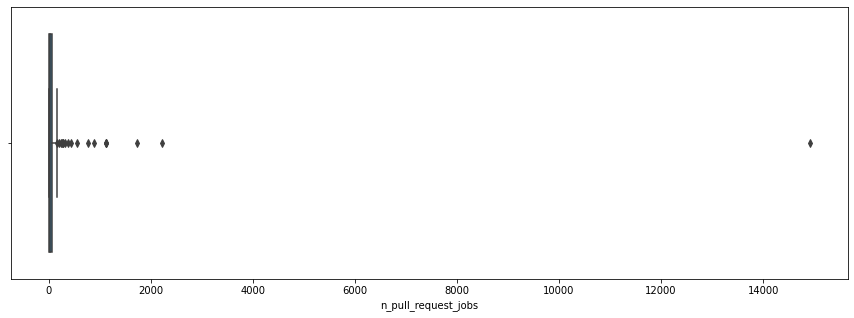

In [339]:
sns.boxplot(x=tags_comparison.n_pull_request_jobs)

In [348]:
tags_comparison[["from_tag", "to_tag", "ahead_by", "n_jobs","n_builds","n_merge_jobs","n_pull_request_jobs"]]

,from_tag,to_tag,ahead_by,n_jobs,n_builds,n_merge_jobs,n_pull_request_jobs
2307,4.5.5,4.5.6,16,0,0,0,0
2296,4.5.6,4.5.7,7,0,0,0,0
2257,5.1,5.1.1,7,0,0,0,0
2271,5.1-RC2,5.1,17,0,0,0,313
2242,5.1.1,5.1.2,12,0,0,0,7
2226,5.1.2,5.2-RC1,2762,10159,1945,23,14913
2172,5.2,5.3-RC1,513,4456,467,0,2228
2209,5.2-RC1,5.2-RC2,4,27,3,0,0
2191,5.2-RC2,5.2-RC3,56,432,48,0,126
2153,5.3-RC1,5.3-RC2,40,297,33,0,45


**Dataframes with job ids from difference commits and jobs ids from pull requests for each pair**

In [340]:
tags_jobs = pd.DataFrame(data, columns=["from_tag", "to_tag", "job_id"])

In [341]:
tags_merge_jobs = pd.DataFrame(merge_data, columns=["from_tag", "to_tag", "job_id"])

Do some jobs appear in both datasets?

In [342]:
tags_merge_jobs[tags_merge_jobs.job_id.isin(tags_jobs.job_id)]

,from_tag,to_tag,job_id


**Do some pull request appear in more than one pair?**

In [350]:
x = tags_merge_jobs.groupby("job_id").from_tag.count()
len(x[x>1])

2715

In [351]:
len(x)

26527

Yes, we have 2715 job ids from pull requests which repeat. We investigate why.

In [356]:
x[x>1].index[0]

100540732

In [357]:
jobs[jobs.id == 100540732]

,id,buildid,started_at,created_at,finished_at,number,state,updated_at,commitsha,commitid,commitmessage,commitref,commitcompare_url
23699,100540732,100540731,2016-01-06T09:44:25Z,2016-01-06T09:30:19.647Z,2016-01-06T10:00:23Z,7039.1,passed,2018-05-29T22:42:09.876Z,e893fefe61c8a9ee94fe676ae09b8ff67cc77c81,28489547,SONAR-7093 Allow projects to define their leak...,refs/pull/704/merge,https://github.com/SonarSource/sonarqube/pull/704


In [359]:
tags_merge_jobs[tags_merge_jobs.job_id == 100540732]

,from_tag,to_tag,job_id
17794,5.3-RC2,5.3-RC3,100540732
18280,5.4-M3,5.4-M4,100540732


In [360]:
prs[prs.pr_number == 704]

,pr_number,title,base_sha,base_ref,head_sha,head_ref
2219,704,SONAR-7093 Allow projects to define their leak...,a07fbac7ad588c9a8936deee82b2250afb98be1c,branch-5.3,36619d7c9a56bef27d2430b77685e7a4f65abb55,feature/jl/5.3_project_leak_period


Looks like it is a new feature which was introduced both in a old version and cherry picked in the upcoming one
* We accept that some builds may affect more than one pair. The way we created pairs is that they are matched with the most similar version (ideally the one it was branched from). This does not prevent developers from cherry picking changes from other branches or fixes to other tags. This would still be considered a change from the previous tag.

### Analyse the type of pull requests for each pair

In [362]:
data = []
def pull_requests_analysis(row):
    if row.name == 873:
        return
    tags_comparison_commits_example = tags_comparison_commits[(tags_comparison_commits.from_tag==row.from_tag) \
                                    & (tags_comparison_commits.to_tag==row.to_tag)].ahead_sha

    commits_pr = pr_commits[pr_commits.commitsha.isin\
           (tags_comparison_commits_example)]
    
    #pull_requests = prs[prs.pr_number.isin(commits_pr.pr_number)]
    pull_requests = prs[prs.head_sha.isin(tags_comparison_commits_example)]
    
    pr_merged_in_master = 0
    pr_merged_in_feature_branch = 0
    pr_merged_from_master = 0
    pr_merged_from_feature_branch = 0
    branches_to_analyse = []
    print("-"*20)
    print(f"{row.from_tag}->{row.to_tag}")
    for i, pr in pull_requests.iterrows():
        added = False
        #base
        if("master" == pr.base_ref):
            pr_merged_in_master+=1
        else:
            branches_to_analyse.append((pr.base_ref, pr.base_sha, pr.head_ref, pr.head_sha))
            added=True
            pr_merged_in_feature_branch+=1
        #head
        if("master" == pr.head_ref):
            pr_merged_from_master+=1
        else:
            if(not added):
                branches_to_analyse.append((pr.base_ref, pr.base_sha, pr.head_ref, pr.head_sha))
            pr_merged_from_feature_branch+=1
    
    print(f"pr_merged_in_master: {pr_merged_in_master}")
    print(f"pr_merged_in_feature_branch: {pr_merged_in_feature_branch}")
    print(f"pr_merged_from_master: {pr_merged_from_master}")
    print(f"pr_merged_from_feature_branch: {pr_merged_from_feature_branch}")
            
    for branch in branches_to_analyse:
        data.append((row.from_tag, row.to_tag, branch[0], branch[1], branch[2], branch[3]))
        print(f"{branch[0]}, sha {branch[1][:6]}, {branch[2]}, sha {branch[3][:6]} has number jobs:", len(jobs[jobs.commitref==f"refs/heads/{branch[0]}"]))

In [363]:
x = tags_comparison.iloc[:-2]
x.apply(pull_requests_analysis, axis=1)

--------------------
4.5.5->4.5.6
pr_merged_in_master: 1
pr_merged_in_feature_branch: 4
pr_merged_from_master: 0
pr_merged_from_feature_branch: 5
branch-4.5, sha 4dc904, feature/4.5-vulnerability-fixes, sha 00ba23 has number jobs: 0
branch-4.5, sha 41c60e, feature/fix_unescaped_html_in_big_file_source, sha fc8a15 has number jobs: 0
branch-4.5, sha fc8a15, feature/fix_ssf_37, sha 814bcf has number jobs: 0
master, sha 8c2148, feature/4.5-vulnerability-fixes, sha 4dc904 has number jobs: 24092
branch-4.5, sha 9222a5, feature/4_5_SONAR-6547, sha a95358 has number jobs: 0
--------------------
4.5.6->4.5.7
pr_merged_in_master: 0
pr_merged_in_feature_branch: 0
pr_merged_from_master: 0
pr_merged_from_feature_branch: 0
--------------------
5.1->5.1.1
pr_merged_in_master: 0
pr_merged_in_feature_branch: 0
pr_merged_from_master: 0
pr_merged_from_feature_branch: 0
--------------------
5.1-RC2->5.1
pr_merged_in_master: 0
pr_merged_in_feature_branch: 3
pr_merged_from_master: 0
pr_merged_from_feature_b

master, sha d37004, feature/drop_hibernate_on_server, sha 9fb413 has number jobs: 24092
master, sha 183b10, warnings1, sha 6f7dcf has number jobs: 24092
master, sha e1f732, feature/upgrade_mvn, sha 75dbc1 has number jobs: 24092
master, sha 17e8f5, feature/ce_check_analysis_date, sha 1770cc has number jobs: 24092
master, sha 37a018, feature/qg_events_in_CE, sha edb837 has number jobs: 24092
master, sha a77b83, feature/issue_debt_aggregation, sha 8f7068 has number jobs: 24092
master, sha 8714a3, patch-1, sha 9c8875 has number jobs: 24092
master, sha d70f02, feature/custom_log_stream, sha 6e07e1 has number jobs: 24092
master, sha 0cf3bf, feature/move_sqale_measures_to_ce, sha fe5aaa has number jobs: 24092
master, sha 5a9eaa, feature/ws_measures_metrics, sha a77b83 has number jobs: 24092
master, sha 854ad6, feature/ws_measures_create, sha bfc222 has number jobs: 24092
master, sha c43acd, feature/faster_servertester, sha 136e36 has number jobs: 24092
master, sha b06147, feature/profile_back

master, sha 8c45a3, feature/SONAR-6347, sha 86b158 has number jobs: 24092
master, sha dca673, feature/debt_ratio_on_ncloc_only, sha 47ab49 has number jobs: 24092
master, sha b48e0f, feature/analysis_context_report, sha 991c4b has number jobs: 24092
master, sha 6734d7, feature/modify_default_QG_mk2, sha 9b1ff9 has number jobs: 24092
master, sha 324ffa, feature/views_measures, sha 735d9f has number jobs: 24092
master, sha 51e705, feature/SONAR-6548, sha 004f17 has number jobs: 24092
master, sha cdcc70, feature/delete_duplicates_provisioning, sha 99374f has number jobs: 24092
master, sha 0911df, feature/SONAR-6845, sha 361c41 has number jobs: 24092
master, sha 361c41, feature/ws_active_rules_with_protobuf, sha e7b45f has number jobs: 24092
master, sha 86b158, feature/SONAR-6540, sha 5de0cf has number jobs: 24092
master, sha 68dc84, feature/SONAR-6547, sha b9b0e4 has number jobs: 24092
master, sha 0d1b0b, feature/optimize_issues_mode, sha ce60ac has number jobs: 24092
master, sha e58da2, f

master, sha b34b98, feature/improve_batch, sha 3e5cbb has number jobs: 24092
master, sha bc4459, feature/add_DevCockpitBridge, sha 5934fd has number jobs: 24092
master, sha 7588a7, feature/ws_new_ws_client, sha 08d329 has number jobs: 24092
master, sha 5e41c3, feature/since_previous_version, sha becbd7 has number jobs: 24092
master, sha 69095c, feature/duplication_metrics_in_CE, sha af5d5f has number jobs: 24092
master, sha a9cfde, feature/add_duplication_tokens, sha 357f66 has number jobs: 24092
master, sha af5d5f, feature/issue_tracking, sha 3e019c has number jobs: 24092
feature/improve_batch, sha 3e5cbb, feature/speed_up_issues, sha 7f652d has number jobs: 110
master, sha 603295, feature/issue_location, sha ae7efa has number jobs: 24092
master, sha 7fb14c, feature/generate_user_token, sha 7fb14c has number jobs: 24092
master, sha 678d27, feature/SONAR-6323_ignore_duplication_on_same_file, sha d2494d has number jobs: 24092
master, sha 240cf9, feature/better_author_dao, sha 25d177 has

master, sha ec96c3, feature/tb/measures_component, sha 44a801 has number jobs: 24092
master, sha 58b210, feature/drop_testing_harness, sha 3e6f3e has number jobs: 24092
master, sha bbda3c, feature/sl/changes_for_better_devcockpit, sha bbda3c has number jobs: 24092
master, sha acdb68, feature/drop_supported_env, sha a7a483 has number jobs: 24092
--------------------
5.4-M9->5.4-M10
pr_merged_in_master: 6
pr_merged_in_feature_branch: 0
pr_merged_from_master: 0
pr_merged_from_feature_branch: 6
master, sha cd6c1b, feature/jl/remove_update_user_attributes_prop, sha 6c1bb2 has number jobs: 24092
master, sha b2ffd2, feature/sl/new_method_for_devcockpit, sha cd6c1b has number jobs: 24092
master, sha 299ac6, feature/sl/project_key_check_in_CE, sha 9b7900 has number jobs: 24092
master, sha 9b7900, feature/tb/users_current_additional_information, sha b4bd77 has number jobs: 24092
master, sha cd6c1b, feature/jl/fail_if_email_already_exists, sha 3219b9 has number jobs: 24092
master, sha d2be42, fea

master, sha b9a059, jh/add_report_global_settings, sha 2a6cf5 has number jobs: 24092
master, sha 6ae57e, jh/fix_new_cpd_api, sha 26a0dd has number jobs: 24092
master, sha b5f917, jh/subdir_in_analysis_report, sha 041748 has number jobs: 24092
--------------------
5.5-M11->5.5-M12
pr_merged_in_master: 10
pr_merged_in_feature_branch: 0
pr_merged_from_master: 0
pr_merged_from_feature_branch: 10
master, sha 31c926, feature/sl/plugin_bridge, sha 5482aa has number jobs: 24092
master, sha c156d7, feature/sl/optimize_qp_search_ws, sha 0dd3ac has number jobs: 24092
master, sha 946a44, feature/expose_sq_version_on_sensorcontext, sha 10955e has number jobs: 24092
master, sha df83af, feature/jl/drop_manual_rule_issue, sha 66e512 has number jobs: 24092
master, sha 2cf5d0, feature/fix_coverage_proto_3, sha 946a44 has number jobs: 24092
master, sha 10955e, feature/tb/identity_providers, sha 7c1ed8 has number jobs: 24092
master, sha d83d13, feature/sl/ComputeEngineSide_annotation, sha 3cf7d3 has numbe

master, sha 405256, feature/deprecation, sha 8bb1f7 has number jobs: 24092
master, sha cbe500, feature/tb/deprecated-rules-count-in-qp-ws, sha a7ab4d has number jobs: 24092
master, sha fd2274, feature/jl/upload_plugin_ws, sha 39c40e has number jobs: 24092
master, sha eef209, feature/sl/SONAR-7705/clean_projects_and_snaphots_inconsistencies, sha d3b7c3 has number jobs: 24092
master, sha 6f6d43, feature/jl/do_not_remove_session_when_401, sha 92f76d has number jobs: 24092
master, sha 3b2bd4, feature/text_range, sha eb67b4 has number jobs: 24092
master, sha 3a27ef, feature/jl/use_X_FORWARDED_PROTO_to_detect_https, sha be5552 has number jobs: 24092
master, sha be5552, feature/dm/sensor_error, sha ae5a68 has number jobs: 24092
master, sha 90b5fc, feature/sl/SONAR-7719/remove_version_does_not_remove_version_on_snapshot, sha 708f38 has number jobs: 24092
master, sha 57ad62, feature/tb/dates-quality-profiles, sha 655df7 has number jobs: 24092
master, sha d3b7c3, feature/sl/SONAR-7804/dont_creat

master, sha 6e56ac, feature/jl/add_emails_settings_in_api, sha ade78d has number jobs: 24092
master, sha 59de2c, feature/jl/flash_is_using_cookie, sha aec72f has number jobs: 24092
master, sha 0e1b37, feature/sl/SONAR-6992/persistent_core_id, sha 4abfa4 has number jobs: 24092
master, sha 355e94, feature/jl/tuesday_hardening, sha 71a9ed has number jobs: 24092
master, sha ebc1a2, feature/sl/SONAR-8058/fix_db_migration_wrong_views_definition_key, sha 194758 has number jobs: 24092
master, sha 011a9f, feature/jl/return_license_names, sha 43eb45 has number jobs: 24092
master, sha 90b5e2, feature/jl/remove_compare_feature, sha 0e16e7 has number jobs: 24092
master, sha 194758, feature/sl/SONAR-7909/reset_sharedmemory_at_startup, sha 4f877f has number jobs: 24092
master, sha 0b92cb, feature/tb/settings_validations, sha 50b630 has number jobs: 24092
master, sha 1624eb, feature/jl/send_email_should_not_generate_error_500, sha e34336 has number jobs: 24092
master, sha 43eb45, feature/jl/valid_ip_a

master, sha 78e5ea, feature/jl/update_project_index_when_updating_project, sha 302e60 has number jobs: 24092
master, sha bf710a, feature/jl/handle_authorization_in_api_measures_search, sha 1609c6 has number jobs: 24092
master, sha 8a806e, feature/sl/SONAR-8096/fix_missing_builder_clear, sha 463f2a has number jobs: 24092
master, sha 52fd4c, feature/jl/improve_error_handling_in_sso, sha 4b54fa has number jobs: 24092
master, sha 972fbd, feature/tb/ws_search_projects_facets, sha e5285d has number jobs: 24092
master, sha 84fcbd, feature/tb/ws-projects-search-measures, sha 7b26a6 has number jobs: 24092
master, sha 06d4a9, feature/jl/add_more_operators, sha 1d1e15 has number jobs: 24092
master, sha 936985, feature/jl/clean_server_code_on_coverage, sha 92ff3f has number jobs: 24092
master, sha 25a690, feature/sb/org-in-permission-templates, sha 7d9c99 has number jobs: 24092
master, sha e49f90, feature/sl/SONAR-8100/check_user_organization_in_ws_organizations_delete, sha ff99d2 has number jobs:

master, sha 58f565, feature/sl/SONAR-8501/fix_uuid_leak, sha f8cd06 has number jobs: 24092
master, sha 0e50e4, feature/jl/6.3_hardening_4, sha f294cc has number jobs: 24092
master, sha e44890, feature/sl/SONAR-8586/fix_project_measure_query_on_h2_with_little_data, sha c87a24 has number jobs: 24092
master, sha 07dc8a, feature/sl/SONAR-8651/add_organization_to_api_projects_create, sha 6450dc has number jobs: 24092
master, sha 773da2, feature/sl/SONAR-8754/undeletable_organizations, sha 7e59da has number jobs: 24092
master, sha dc4b07, feature/jl/6.3_hardening_7, sha ddf74a has number jobs: 24092
master, sha ddf74a, feature/sl/SONAR-8735/add_ws_api_organizations_search_my_organizations, sha ac69e7 has number jobs: 24092
master, sha e32724, feature/tb/delete_event, sha 637a05 has number jobs: 24092
master, sha 2f2b6f, feature/tb/add_event, sha fbb33d has number jobs: 24092
master, sha 637a05, feature/jl/decrease_nullabiliy_checks_in_events, sha 821b2d has number jobs: 24092
master, sha b0c

master, sha d0c877, feature/teryk/filter-org-pages, sha c4787c has number jobs: 24092
master, sha 6cb42e, feature/teryk/tags-alphabetically, sha 9db4eb has number jobs: 24092
master, sha 6d2b71, feature/atlas/SONAR-8857/quality_profiles_should_belong_to_organizations, sha bc02e1 has number jobs: 24092
master, sha 421198, feature/teryk/search-project-tags, sha 1903c8 has number jobs: 24092
master, sha 1903c8, feature/jl/fix_languages_facet, sha 8b65d7 has number jobs: 24092
master, sha db48fe, feature/teryk/ws-show-with-tags, sha 533004 has number jobs: 24092
master, sha cd877d, feature/teryk/filter-projects-by-tags, sha 313ffa has number jobs: 24092
master, sha a637ef, feature/jl/upgrade_parent, sha 09e3a1 has number jobs: 24092
master, sha fbff4f, feature/sl/SONAR-7485/MessageException_in_CeServer, sha 806fba has number jobs: 24092
master, sha 17cfd1, feature/teryk/595/set-project-tags, sha 120f4b has number jobs: 24092
feature/sl/SONAR−8435/safe_mode_for_all_startup, sha 1277b5, feat

master, sha ec5f54, feature/sl/SONAR-10215/branch-6.7/fix_ISE_in_db_migration_1642, sha 0a1dc2 has number jobs: 24092
branch-6.7, sha 0a1dc2, feature/sl/branch-6.7/SONAR-10297/disable_ce_task_retry, sha b2ca3f has number jobs: 240
master, sha 0ef6fe, feature/sl/SONAR-10247/webhooks_called_only_if_qg_status_changes, sha 34471d has number jobs: 24092
master, sha 99c250, feature/sl/SONAR-10126/add_scm_patch_to_component_in_ce, sha ec804c has number jobs: 24092
master, sha 22ce45, feature/sl/disable_old_gh_plugin, sha 96b3e9 has number jobs: 24092
master, sha 96b3e9, feature/sl/disable_unstable_its, sha ef63a6 has number jobs: 24092
master, sha 981694, feature/MMF-909, sha 981694 has number jobs: 24092
master, sha 4eb8c7, feature/sl/SONAR-10104/async_webhooks_1st_version, sha 08a873 has number jobs: 24092
master, sha 6dc1fa, feature/it-cleanup, sha bff9cf has number jobs: 24092
master, sha 08a873, feature/sl/fix_build_logback_verbosity, sha 6c78e8 has number jobs: 24092
master, sha 4eb8c7,

2307    None
2296    None
2257    None
2271    None
2242    None
2226    None
2172    None
2209    None
2191    None
2153    None
2098    None
2134    None
2115    None
1916    None
1895    None
1874    None
1853    None
1751    None
2077    None
2058    None
2018    None
2040    None
1998    None
1979    None
1958    None
1937    None
1796    None
1797    None
1669    None
1729    None
1708    None
1687    None
1372    None
1645    None
1505    None
1486    None
1467    None
1448    None
1429    None
1624    None
1603    None
1582    None
1562    None
1543    None
1524    None
1410    None
1391    None
1315    None
1353    None
1334    None
1188    None
1296    None
1277    None
1258    None
1239    None
1220    None
1201    None
1105    None
1163    None
1144    None
1085    None
1125    None
1064    None
1044    None
960     None
1023    None
1002    None
981     None
873     None
874     None
800     None
919     None
815     None
773     None
933     None
752     None
731     None

In [364]:
merged_branch = pd.DataFrame(data, columns=["from_tag", "to_tag", "base_branch", "base_sha", "head_branch", "head_sha"])

In [365]:
x = merged_branch.groupby(["head_branch", "head_sha"]).to_tag.count().reset_index()

In [366]:
x[x.to_tag > 1]

,head_branch,head_sha,to_tag
13,fature/jl/fix_new_debt_when_5_periods,df6129a0913277db1ec8f8ac4b9cc0303b8c9c25,2
227,feature/jl/5.3_add_index_ce_queue_component_uuid,93598d6f84ba12c14150f160604605c68b568272,2
228,feature/jl/5.3_project_leak_period,36619d7c9a56bef27d2430b77685e7a4f65abb55,2
230,feature/jl/5.6_SONAR-8144,3fcc98a73d6afb99388e39f46272909a6d6600b2,2
284,feature/jl/fix_add_project_to_qprofile,a56e60d168802ff9dc23ffec978bb412fd501f97,2
456,feature/sb/5.6/test-index,6f621785d7218218432a641e2cbf460763c768f8,2
535,feature/sl/SONAR-10215/branch-6.7/fix_ISE_in_d...,0a1dc2146dd4b142d044c0f85634869410666ed3,2
542,feature/sl/SONAR-10410/rule_system_tags_not_po...,72f64c95fdef18ec950d341c1a9093f30087e1c1,2
549,feature/sl/SONAR-6846/support_duplicate_snapsh...,d94aa825004f0c8666690da143d466d71b31388d,2
584,feature/sl/SONAR-7884/update_center_url_HTTPS,1389151511b840fc40929913a6abd7942f93740c,2


In [367]:
len(merged_branch)

979

In [368]:
merged_branch[merged_branch.head_branch=="feature/jl/fix_add_project_to_qprofile"]

,from_tag,to_tag,base_branch,base_sha,head_branch,head_sha
564,5.6.1,5.6.2,branch-5.6,0ec0be546e4a0bf1956b016a986e1f57ca465618,feature/jl/fix_add_project_to_qprofile,a56e60d168802ff9dc23ffec978bb412fd501f97
636,6.0,6.1-RC1,branch-5.6,0ec0be546e4a0bf1956b016a986e1f57ca465618,feature/jl/fix_add_project_to_qprofile,a56e60d168802ff9dc23ffec978bb412fd501f97


In [327]:
y = tags_comparison_commits[(tags_comparison_commits.from_tag=="5.6.1") \
                                    & (tags_comparison_commits.to_tag=="5.6.2")]

In [328]:
z = tags_comparison_commits[(tags_comparison_commits.from_tag=="6.0") \
                                    & (tags_comparison_commits.to_tag=="6.1-RC1")]

In [329]:
set(y.ahead_sha).intersection(set(z.ahead_sha))

{'014f2053e5360baa98762f163f11e88843eed9a8',
 '0359411125578632c70ccf458625d0163c2b8b16',
 '0ec0be546e4a0bf1956b016a986e1f57ca465618',
 '1389151511b840fc40929913a6abd7942f93740c',
 '1b9b161ffc7a35433028102f17ea968622ae1134',
 '2752d139c969d96e016fe2941443acefbebee8c8',
 '41982569ee10a4be63a931efdc855d4170e68bc5',
 '54e5d34f816386987a5ccd0634e311d692a64588',
 '5a2e1d41660c60804689c914c37b006d4fb86035',
 '7a5a65c74ebdbe4d5d39795c72d7aa9df95b88a9',
 '935f49ee8a39366098bb4627a2e0aa700f762fa2',
 'a56e60d168802ff9dc23ffec978bb412fd501f97',
 'a79dddadd5038e9d6bbc26d363e39576180c1063',
 'c5f4811ce2b4ee1f373c31d104acda9c73a476b9',
 'cdfee0b5b7ec3074e16c9f94c8b4fb7ea1fea274',
 'd1c0148e374c5d6ccc7a2469eb468389a42ae9ef',
 'd94aa825004f0c8666690da143d466d71b31388d',
 'e0c834ebf18b722009ae5940e98b5916c8bbea71',
 'fe77597e418fb06ce2e10fe786f9dfd667aa2c19',
 'ff3377f4bcb5b97c16d7bee5d2dd0cae9b95cf9e'}

This confirms that not all pairs have empty intersection. This is okay. Some changes are developed as fix or feature for a version and included into the upcoming one.